In [61]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file

Saving sales_data.csv to sales_data (1).csv


In [62]:

import sqlite3  # For database operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Enable inline plots in Colab
%matplotlib inline



# Add a Revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

# Display DataFrame
df.head()

,Date,Product,Quantity,Price,Revenue
0,2025-01-01,Product A,5,100,500
1,2025-01-02,Product B,7,150,1050
2,2025-01-03,Product C,3,200,600
3,2025-01-04,Product A,4,100,400
4,2025-01-05,Product B,6,150,900


In [63]:
# Connect to SQLite (creates a database file)
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Create a sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date TEXT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sales data into the table
df.to_sql("sales", conn, if_exists="replace", index=False)

# Commit and close connection
conn.commit()

In [64]:
# Query total sales per product
query = "SELECT product, SUM(quantity * price) AS total_sales FROM sales GROUP BY product"
df_sales = pd.read_sql(query, conn)

# Display result
df_sales

,Product,total_sales
0,Product A,900
1,Product B,1950
2,Product C,600


In [65]:
# Connect to the database (if not already connected)
import sqlite3
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Execute your SQL queries
query1 = "SELECT product, SUM(quantity * price) AS total_sales FROM sales GROUP BY product"
cursor.execute(query1)
result1 = cursor.fetchall()
print(result1)  # Print the results

query2 = "SELECT product, SUM(quantity) AS total_quantity FROM sales GROUP BY product"
cursor.execute(query2)
result2 = cursor.fetchall()
print(result2)

query3 = "SELECT date, SUM(quantity * price) AS daily_revenue FROM sales GROUP BY date ORDER BY date ASC"
cursor.execute(query3)
result3 = cursor.fetchall()
print(result3)



# Close the connection (optional if you're done with the database)
conn.close()

with open("queries.sql", "w") as file:
    file.write(query1 + "\n")
    file.write(query2 + "\n")
    file.write(query3 + "\n")

files.download("queries.sql")



[('Product A', 900), ('Product B', 1950), ('Product C', 600)]
[('Product A', 9), ('Product B', 13), ('Product C', 3)]
[('2025-01-01', 500), ('2025-01-02', 1050), ('2025-01-03', 600), ('2025-01-04', 400), ('2025-01-05', 900)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

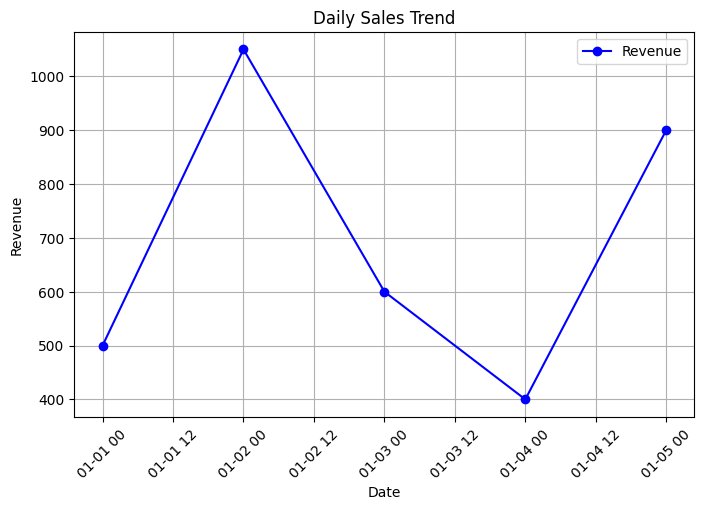

In [58]:
import sqlite3
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Re-establish connection to the database
conn = sqlite3.connect("sales.db")  # Reconnect to the database

# Query sales trend over time
query = "SELECT date, SUM(quantity * price) AS daily_revenue FROM sales GROUP BY date ORDER BY date ASC"
df_trend = pd.read_sql(query, conn)

# Convert date column to datetime
df_trend["Date"] = pd.to_datetime(df_trend["Date"])

# Plot sales trend
plt.figure(figsize=(8,5))
plt.plot(df_trend["Date"], df_trend["daily_revenue"], marker='o', linestyle='-', color='blue', label="Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Close the connection when done
conn.close() # Close the connection after using it


In [57]:
# Save the database file
from google.colab import files
files.download("sales.db")

# Save the queries file
files.download("queries.sql")

# Save the CSV file
files.download("/sales_data.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>